In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

import pandas as pd

,epsilon,abs_error
0,1.000000e-03,1.359594e-03
1,1.000000e-04,1.359186e-04
2,1.000000e-05,1.359150e-05
3,1.000000e-06,1.358972e-06
4,1.000000e-07,1.399467e-07
5,1.000000e-08,6.602751e-09
6,1.000000e-09,2.154419e-07
7,1.000000e-10,1.547709e-06


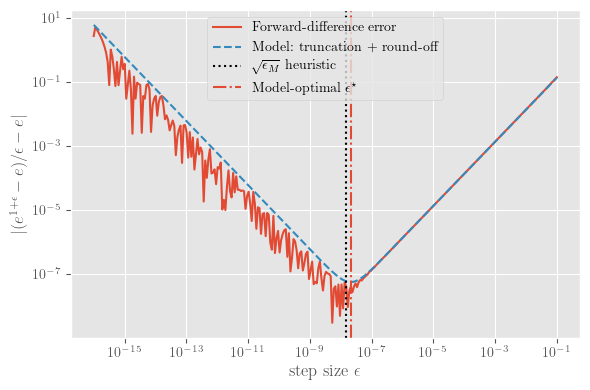

In [9]:
x = 1.0
f = np.exp
true_deriv = f(x)
epsM = np.finfo(float).eps

# Fine grid for the curve
eps_vals = np.logspace(-16, -1, 300)
forward_diff = (f(x + eps_vals) - f(x)) / eps_vals
err = np.abs(forward_diff - true_deriv)

# Simple model: C1*epsilon + C2*epsM/epsilon
C1 = 0.5 * f(1.0)      # ≈ 0.5*e  (from forward-diff truncation term)
C2 = f(1.0)            # ≈ e      (round-off scale)
model = C1*eps_vals + C2*epsM/eps_vals
eps_star_rule  = np.sqrt(epsM)
eps_star_model = np.sqrt((C2*epsM)/C1)

# --- Plot ---
fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(eps_vals, err, label="Forward-difference error")
ax.loglog(eps_vals, model, linestyle="--", label="Model: truncation + round-off")
ax.axvline(eps_star_rule,  linestyle=":",  label=r"$\sqrt{\epsilon_M}$ heuristic", color="black")
ax.axvline(eps_star_model, linestyle="-.", label=r"Model-optimal $\epsilon^\star$")
ax.set_xlabel(r"step size $\epsilon$")
ax.set_ylabel(r"$| (e^{1+\epsilon}-e)/\epsilon - e |$")
# ax.set_title(r"U-shaped error curve for $f(x)=e^x$ at $x=1$")
ax.legend(loc="best")
fig.tight_layout()
fig.savefig("../../../figs/nle/forward_difference_error.pdf", transparent=True)

# --- Table at specific epsilons ---
eps_list = np.array([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10])
approx = (f(x + eps_list) - f(x)) / eps_list
tab_err = np.abs(approx - true_deriv)

df_numeric = pd.DataFrame({"epsilon": eps_list, "abs_error": tab_err})
df_numeric